# KNN (K最近邻算法/K近邻算法)

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

## 1. K近邻算法
### 1.1 算法原理

KNN算法是一个典型的`监督学习`算法，它的核心思想是：**未标记样本**的类别由距离其最近的*K*个邻居通过投票来决定。

具体而言，假设存在一个已经标记好的数据集。给定一个未标记的数据样本，我们的任务是：预测出该数据样本所属的类别。

- **KNN的原理是：**
    - 计算待标记样本和数据集中每个样本的距离
    - 取距离最近的K个样本
    - 待标记的样本所属类别由着K个距离最近的样本投票产生
 
 
- **KNN算法原理伪代码：**
    - 假设X_test为待测 样本，X_train为已标记的数据集：
    - 遍历X_train中所有的样本，计算每个样本与X_test的距离，并把距离保存在Distance数组中
    - 对Distance数组进行排序，取距离最近的k个点，并保存到X_knn数组中
    - 在X_knn中统计每个类别的个数，例如：X_knn中有多少给样本属于类别0，多少个样本属于类别1.
    - 在X_knn中样本数最多的类别即待测样本X_test的预测分类


- **KNN算法简单示例**

下图中所显示的数据集是良好的数据集，即都有对应的标签，一类是<font color="blue">蓝色正方形</font>，一类是<font color="red">红色三角形</font>，<font color="green">绿色圆形</font>是待分类数据。

![Image](http://ouxinyu.cn/Teaching/MachineLearning/Attachments/Ch0301.png)

- K = 3时，范围内红色三角形较多，待分类样本属于红色三角形类

- K = 5时，范围内蓝色正方形较多，待分类样本属于蓝色正方形类

<font color="red">如何选择一个最佳的K值取决于数据。</font>一般情况下，较大的K值能减少噪声的影响，但会使类别之间的界限变得模糊 。因此，K的取值通常较小（通常K<20）。<font color="blue">在scikit-learn中，K近邻算法的K值通过参数n_neighbors来调节，默认值为5.</font>


### 1.2 算法优缺点
- 优点：简单，易于理解，无需建模与训练，且易于实现。适合对稀有事件进行分类，适合于多分类问题
- 缺点：惰性算法，内存开销大，性能较差，可解释性差


## 2. K最近邻算法的用法

0. 载入各种需要的库文件

In [1]:
# 导入样数据集生成器
from sklearn.datasets import make_blobs
# 从近邻算法子库中导入K近邻分类器KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# 导入绘图工具箱 matplotlib
import matplotlib.pyplot as plt
# 从模型选择子库中导入数据集拆分工具
from sklearn.model_selection import train_test_split
#导入计算库
import numpy as np

### 2.1 二分类任务

#### 1. 生成数据集

- 自动生成聚类中心

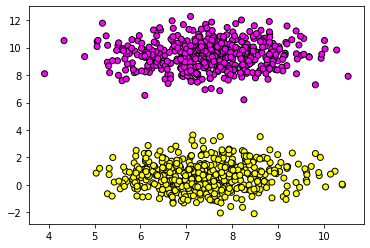

In [2]:
# 生成数据集，样本数=1000, 类别数=2
X, y = make_blobs(n_samples = 1000, centers = 2, random_state = 8)

# 将生成的数据集进行可视化
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.spring, edgecolor = 'k')
plt.show()

- 手动指定聚类中心

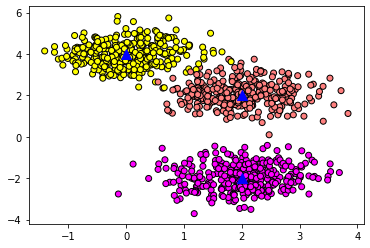

In [3]:
# 使用手动方式指定聚类中心，并生成数据集，样本数=1000，类别数=3
centers = [[2, -2], [2, 2], [0, 4]]
X2, y2 = make_blobs(n_samples = 1000, centers = centers, cluster_std = 0.6, random_state = 8)

c = np.array(centers) # 将聚类中心转换为 numpy矩阵

# 将生成的数据集进行可视化
plt.scatter(X2[:, 0], X2[:, 1], c = y2, cmap = plt.cm.spring, edgecolor = 'k')
plt.scatter(c[:,0], c[:,1], s=100, marker='^',c='blue')  # 绘制聚类中心
plt.show()

#### 2. 划分训练集和测试集

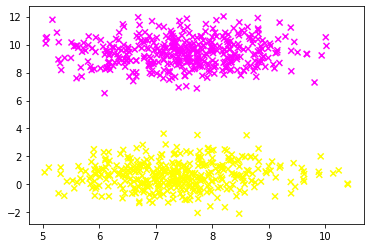

In [4]:
X_train = X[0:800]
y_train = y[0:800]
X_test = X[800:]
y_test = y[800:]

# 分别可视化训练样本和测试样本
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.spring, edgecolor = 'k', marker='x')
# plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.cm.spring, edgecolor = 'k', marker='o')
plt.show()

#### 3. 基于训练集数据训练KNN模型

In [5]:
# 使用生成的训练集数据(X, y)训练KNN分类器
clf = KNeighborsClassifier(n_neighbors = 5) # n_neighbors = 5为默认近邻数量
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### 4. 预测及评分

- 使用训练好的模型对测试数据进行分类拟合 <font color="red">执行时间大约7秒</font>

正在使用模型，对训练样本的 y 值进行预测...执行时间为：6.54


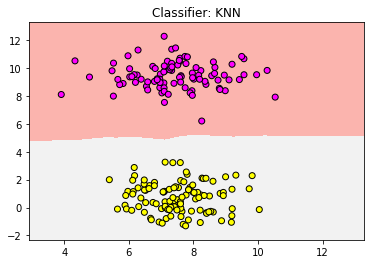

In [6]:
import time

t_start = time.perf_counter() # 启动计时器
print("正在使用模型，对训练样本的 y 值进行预测...", end="")

# 将分类结果进行可视化
#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 1].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

print("执行时间为：{:.2f}".format(time.perf_counter() - t_start)) # 输出执行时间

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Pastel1)

#用散点把样本表示出来
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = plt.cm.spring, edgecolor = 'k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier: KNN")
plt.show()


- 对给定样本进行分类

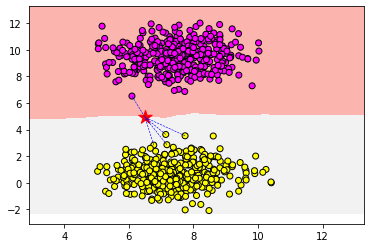

新数据点([6.5  4.92])在KNN分类器上的分类结果为：[1]


In [7]:
# 将训练集进行可视化
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Pastel1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.spring, edgecolor = 'k')

# 指定待分类的新数据点 X_sample, 并使用KNN分类器对其进行分类预测
X_sample = np.array([[6.5, 4.92]])
y_sample = clf.predict(X_sample)

# 将新数据点进行可视化
plt.scatter(X_sample[0][0], X_sample[0][1], marker = "*", c = "red", s = 200)

# 获得样本的近邻点，默认情况下数量(n_neighbors = 5)为默认近邻数量，同时输出这些点于预测点连线
# 此处 kneighbors()获取到的是X中的近邻样本的索引值
neighbors = clf.kneighbors(X_sample, return_distance = False)
for i in neighbors[0]:
    plt.plot([X_train[i][0], X_sample[0][0]], [X_train[i][1], X_sample[0][1]], 'b--', linewidth = 0.6)
plt.show()

# 输出分类预测结果
print("新数据点({0})在KNN分类器上的分类结果为：{1}".format(X_sample[0], y_sample))

- 输出新数据点([6.5  4.92])的近邻索引号

In [8]:
neighbors = clf.kneighbors(X_sample, return_distance=False)
print("新数据点{0}, 包含{1}个近邻，它们分别是: {2}.".format(X_sample, neighbors.size, neighbors))

新数据点[[6.5  4.92]], 包含5个近邻，它们分别是: [[589 281 194 247  83]].


- 输出模型准确率

使用clf.score()函数可以实现在给定数据集上测试模型的准确率

In [9]:
# 输出模型评分结果
print("模型正确率为：{:.2f}".format(clf.score(X_test, y_test)))

模型正确率为：1.00


### 2.2 多分类任务

#### 1. 生成数据集

在make_blobs()函数中，参数centers表示聚类中心的数量，参数n_samples表示样本数。

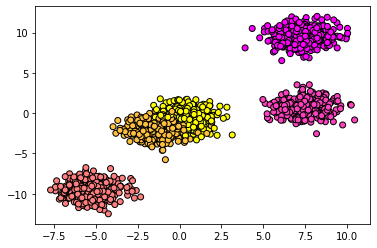

In [10]:
# 生成数据集，样本数=1000, 类别数=2
n_samples = 1500
X2, y2 = make_blobs(n_samples = n_samples, centers = 5, random_state = 8)

# 将生成的数据集进行可视化
plt.scatter(X2[:, 0], X2[:, 1], c = y2, cmap = plt.cm.spring, edgecolor = 'k')
plt.show()

##### 2. 划分训练集和测试集

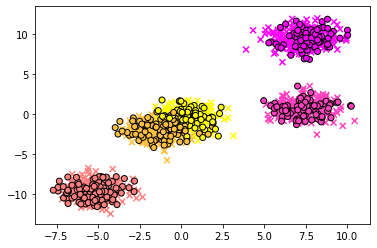

In [11]:
test_rate = 0.7
split_index = int(n_samples * test_rate)
X2_train = X2[0:split_index]
y2_train = y2[0:split_index]
X2_test = X2[split_index:]
y2_test = y2[split_index:]

# 分别可视化训练样本和测试样本， x: 训练集， o: 测试集
plt.scatter(X2_train[:, 0], X2_train[:, 1], c = y2_train, cmap = plt.cm.spring, edgecolor = 'k', marker='x')
plt.scatter(X2_test[:, 0], X2_test[:, 1], c = y2_test, cmap = plt.cm.spring, edgecolor = 'k', marker='o')
plt.show()

#### 3. 基于训练集数据训练KNN模型

下代码将使用K近邻算法创建分类模型。

In [12]:
# 使用生成的数据集(X, y)训练KNN分类器
clf2 = KNeighborsClassifier()
clf2.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### 4. 预测及评分

- 使用训练好的模型对测试数据进行分类拟合 <font color="red">执行时间大约23秒</font>

正在使用模型，对训练样本的 y 值进行预测...执行时间为：22.03


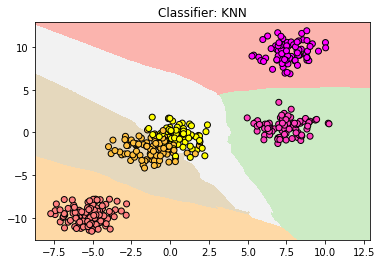

In [13]:
import time

t_start = time.perf_counter() # 启动计时器
print("正在使用模型，对训练样本的 y 值进行预测...", end="")

# 将分类结果进行可视化
#分别用样本的两个特征值创建图像和横轴和纵轴
x2_min, x2_max = X2_test[:, 0].min() - 1, X2_test[:, 1].max() + 1
y2_min, y2_max = X2_test[:, 1].min() - 1, X2_test[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x2_min, x2_max, 0.02), np.arange(y2_min, y2_max, 0.02))
Z2 = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

print("执行时间为：{:.2f}".format(time.perf_counter() - t_start)) # 输出执行时间

#给每个分类中的样本分配不同的颜色
Z2 = Z2.reshape(xx2.shape)
plt.pcolormesh(xx2, yy2, Z2, cmap = plt.cm.Pastel1)

#用散点把样本表示出来
plt.scatter(X2_test[:, 0], X2_test[:, 1], c = y2_test, cmap = plt.cm.spring, edgecolor = 'k')
plt.xlim(xx2.min(), xx2.max())
plt.ylim(yy2.min(), yy2.max())
plt.title("Classifier: KNN")
plt.show()

- 输出模型准确率

In [14]:
# 输出模型评分结果
print("模型正确率为：{:.2f}".format(clf2.score(X2_test,y2_test)))


模型正确率为：0.94


### 2.3 回归分析

#### 1. 生成数据集

回归分析数据集生成器：[sklearn.datasets.make_regression](functions/sklearn.datasets.make_regression.ipynb)

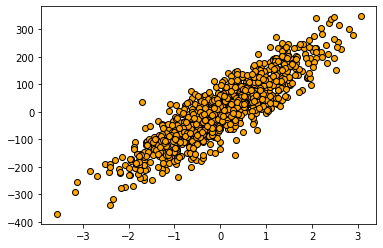

In [15]:
# 导入绘图工具箱 matplotlib
import matplotlib.pyplot as plt

# 导入make_regression数据集生成器
from sklearn.datasets import make_regression

#生成特征数为 1, 噪声为 50的的数据集
X, y = make_regression(n_samples=1000, n_features = 1, n_informative = 1, noise = 50, random_state = 8)

# 用散点图将数据点纪念性可视化
plt.scatter(X, y, c = 'orange', edgecolor = 'k')
plt.show()

#### 2. 划分训练集和测试集

使用train_test_split()函数对数据集进行划分

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, test_size = 0.3)

#### 3. 基于训练集训练KNN 回归模型

In [17]:
from sklearn.neighbors import KNeighborsRegressor

# 用 KNN模型拟合数据
reg = KNeighborsRegressor(n_neighbors = 5) # n_neighbors=5 是 K近邻算法的默认值
reg.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

#### 4. 预测及评分

- 使用测试数据对训练好的模型进行拟合

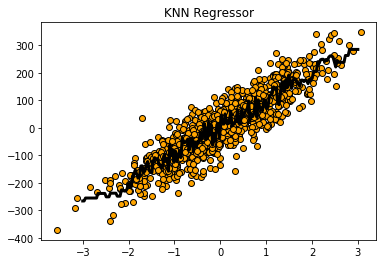

In [18]:
import numpy as np

# 把预测结果用图像进行可视化
z = np.linspace(-3, 3, 200).reshape(-1, 1)
plt.scatter(X, y, c = 'orange', edgecolor = 'k')
plt.plot(z, reg.predict(z), c = 'k', linewidth = 3)

# 向图像添加标题
plt.title("KNN Regressor")
plt.show()


- 输出模型准确率

In [19]:
print("模型评分：{:.2f}".format(reg.score(X_test, y_test)))

模型评分：0.75


#### 5. 模型优化

机器学习算法对于超参数是非常敏感的，对于不同的数据集，需要设置不同的超参数，否则就会容易产生`欠拟合问题`或`过拟合问题`，因此我们尝试将近邻数量进行修改，其中一个典型值 n_neighbors = 13.

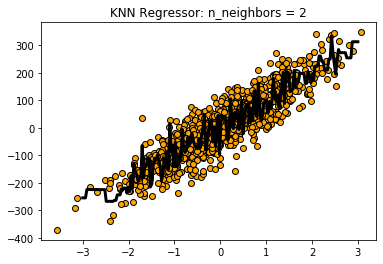

In [20]:
from sklearn.neighbors import KNeighborsRegressor

# 减少模型的近邻数 n_neighbors参数为 2
reg2 = KNeighborsRegressor(n_neighbors = 2)
reg2.fit(X_train, y_train)

# 重新进行可视化
plt.scatter(X, y, c = 'orange', edgecolor = 'k')
plt.plot(z, reg2.predict(z), c='k', linewidth = 3)
plt.title('KNN Regressor: n_neighbors = 2')
plt.show()

输出模型评分：

In [21]:
print("优化后的模型评分: {:.2f}".format(reg2.score(X_test, y_test)))

优化后的模型评分: 0.70


## 3. K最近邻算法案例 —— 酒的分类

下面将使用scikit-learning库对内置数据集“酒数据集”进行实验，该数据集包含在scikit-learning的datasets模块中。

### 3.1 生成数据集及数据集分析

#### - 载入数据集

In [22]:
from sklearn.datasets import load_wine

# 从sklearn的datasets模块中载入数据集
wine_dataset = load_wine()

#### - 查看load_wine数据集的键值（字段）

In [23]:
print("红酒数据集中的键：{}".format(wine_dataset.keys()))

红酒数据集中的键：dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


通过print()函数，可以看到数据集wine中包含的字段, 即数据集的相关数据和内容：

- data：数据
- target：目标分类
- target_names: 目标分类名称
- DESCR：数据描述
- feature_names：特征变量的名称

#### - 查看数据集的形状

所谓数据集的形状，包括数据的样本数(行数)和数据的特征数（列数）

In [24]:
print("数据形状概况: {}".format(wine_dataset['data'].shape))

数据形状概况: (178, 13)


#### - 查看目标分类

In [25]:
print(wine_dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [26]:
print(wine_dataset['target_names'])

['class_0' 'class_1' 'class_2']


#### - 查看目标分类名称

In [27]:
print(wine_dataset['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


#### - 查看数据集的描述信息

In [28]:
print(wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### 3.2 对数据集进行拆分（训练集+测试集） 

在scikit-learn中，使用train_test_split()函数实现数据集的拆分，默认情况下训练集和测试集按照`75%:25%`的比例进行拆分。但在实际工作中，习惯使用将数据集拆分成三个部分，
- 对于大型的数据集，特别是真实的应用中，一个典型的拆分方案是：训练集70%、验证集10%、测试集20%
- 对于中小型数据集，可以考虑只分为训练集和测试集，典型的拆分方案包括：<font color='red'>训练集 : 测试集 = 70%:30%, 75%:25%, 80%:20%</font>

在进行性能评估的时候，只要保证各个算法拥有一致的划分比例，则不管采用什么样的比例进行拆分都是可以接受的。

此处，我们同样可以使用train_test_split()函数实现这种划分。

<font color="blue">**【知识点】**</font>：关于训练集、验证集和测试集的知识请参考：[train_val_test](Knowledgement/train_val_test.ipynb)

#### 3.2.1 数据集的生成和拆分

In [29]:
    # 导入数据集拆分工具
    from sklearn.model_selection import train_test_split

    # 将数据集进行拆分，按照默认的比例进行拆分，其中训练集占75%，测试集占25%
    X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'], 
                                                        wine_dataset['target'], 
                                                        random_state = 0)

函数train_test_split()可以实现将数据集划分为训练集和测试集，该函数包含4个主要的参数。下面给出该函数的基本格式：
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size, random_state)
- **参数解释**：
    - ***X***: 被划分的样本。由于 ***X*** 表示的是数据的特征，对于每一个样本来说，可能会包含多个特征，即样本可能是一个二维数组，也称为矩阵。因此通常使用大写粗体 ***X*** 表示数据的特征。
    - *y*: 被划分样本的标签。对于每一个样本来说，在大多数情况下，都只有一个类别，因此 *y* 通常是一个数组（或称为向量）。
    - test_size: 测试样本的尺度。可以使用浮点数定义测试样本所占的百分比，也可以直接使用整数定义测试样本的个数。
    - random_state: 随机数种子，缺省值为7. 当随机种子设置为 `random_state = 0` 时，每次生成的随机数都是一样的，该方法用于生成每次都一样的数据集划分。
    
在上述的代码中，我们设置 ***X*** = wine_dataset['data']，表示将wine酒数据集中的data字段设置为`待划分样本`；设置 *y* = wine_dataset['target']，表示将wine酒数据集中的target字段设置为`待划分样本的标签`；test_size 去默认值，表示以75%:25%的比例进行划分；设置random_state = 0, 表示关闭随机参数，每次都将生成同样的划分。

#### 3.2.2 拆分后的数据集分析

In [30]:
print("X: {}".format(wine_dataset['data'].shape))
print("y: {}".format(wine_dataset['target'].shape))
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X: (178, 13)
y: (178,)
X_train shape: (133, 13)
X_test shape: (45, 13)
y_train shape: (133,)
y_test shape: (45,)


### 3.3 使用 KNN最近邻算法构建模型

In [31]:
# 引入KNN分类模型, 并配置KNN分类器，设置近邻数 = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15, weights='distance')

使用fit()函数对训练集数据进行拟合，即: 使用训练数据来训练KNN分类模型。

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

### 3.4 预测及评分

#### 3.4.1 对测试集中的数据进行评分

In [33]:
score_train = knn.score(X_train, y_train)
score_test = knn.score(X_test, y_test)

print("训练集评分:{0:.2f}; 测试集评分:{1:.2f}".format(score_train, score_test))

训练集评分:1.00; 测试集评分:0.73


#### 3.4.2 使用模型对新生成的数据进行预测
1. 查看样本特征集合属性

In [34]:
print("数据集中的样本总共有{}种特征，分别是：{}".format(
    len(wine_dataset['feature_names']), wine_dataset['feature_names']))

数据集中的样本总共有13种特征，分别是：['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


2. 生成预测数据并进行预测

此处我们按照样本的特征的数量，利用`numpy.array`手动生成一个数据（矩阵形式）

In [35]:
import numpy as np
X_new = np.array([[32, 1, 3, 3, 3, 3, 3, 32, 1, 3, 3, 3, 3]])
prediction = knn.predict(X_new)
print("新酒的分类为{}".format(wine_dataset['target_names'][prediction]))

新酒的分类为['class_1']


### 3.5 进一步分析近邻数量对模型评分的影响

此处，我们通过将近邻数量设置为 1~20 共20个值，然后分别求出模型在训练集和测试集上的准确率。最后，通过可视化分数曲线图来对模型进行性能分析。

n_neighbors:1; train_score:1.00; test_score:0.76.

n_neighbors:2; train_score:0.88; test_score:0.73.

n_neighbors:3; train_score:0.89; test_score:0.73.

n_neighbors:4; train_score:0.82; test_score:0.78.

n_neighbors:5; train_score:0.79; test_score:0.73.

n_neighbors:6; train_score:0.74; test_score:0.71.

n_neighbors:7; train_score:0.78; test_score:0.78.

n_neighbors:8; train_score:0.77; test_score:0.67.

n_neighbors:9; train_score:0.75; test_score:0.71.

n_neighbors:10; train_score:0.77; test_score:0.69.

n_neighbors:11; train_score:0.74; test_score:0.69.

n_neighbors:12; train_score:0.74; test_score:0.71.

n_neighbors:13; train_score:0.75; test_score:0.76.

n_neighbors:14; train_score:0.77; test_score:0.73.

n_neighbors:15; train_score:0.75; test_score:0.80.

n_neighbors:16; train_score:0.73; test_score:0.78.

n_neighbors:17; train_score:0.71; test_score:0.73.

n_neighbors:18; train_score:0.74; test_score:0.76.

n_neighbors:19; train_score:0.72; test_score:0.76.

n_neighbors:20; train

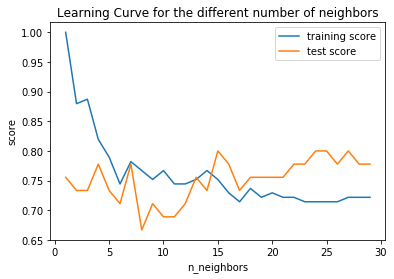

In [36]:
#建立两个空列表，分别用于保存训练集和测试集的模型评分
training_score = []
test_score = []
neighbors_amount = range(1, 30)
for n_neighbors in neighbors_amount:
    clf3 = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf3.fit(X_train, y_train)
    
    score_train = clf3.score(X_train, y_train)
    score_test = clf3.score(X_test, y_test)
    print("n_neighbors:{0}; train_score:{1:.2f}; test_score:{2:.2f}.\n".format(n_neighbors, score_train, score_test))
        
    #把不同的n_neighbors数量对应的得分放进列表
    training_score.append(score_train)
    test_score.append(score_test)
    
    
#下面用matplotlib将得分进行绘图
plt.plot(neighbors_amount, training_score, label = "training score")
plt.plot(neighbors_amount, test_score, label = "test score")
plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.title("Learning Curve for the different number of neighbors")
plt.legend()
plt.show()
    

<font color='red'>PS：可以尝试一下其他近邻数的输出结果，例如：n_neighbors = 50, 100, 200，并试着分析一下输出结果.</font>

## 4. K最近邻算法案例 —— 糖尿病预测

<font style = "color:red; font-weight:bold;">此处，展示如何使用外置数据集进行预测分析。</font>

### 4.1 生成数据集及数据集分析

In [37]:
# 加载 pandas库，并使用read_csv()函数读取糖尿病预测数据集diabetes
import pandas as pd
data = pd.read_csv('../Datasets/diabetes.csv')

# 输出数据集的形状，即展示数据包含的样本数(行)和特征数(列)
print("数据的形状为{}\n".format(data.shape))
data.info()

数据的形状为(768, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


从输出可以看出，数据集中共包含768个样本(entries)，每个样本8种特征。其中**Outcome**是样本的标签（即类别），0表示没有糖尿病，1表示患有糖尿病。此处的8种特征分别是：
- Pregnancies: 怀孕次数
- Glucose：血浆葡萄糖浓度
- BloodPressure：舒张压 
- SkinThickness：肱三头肌皮肤褶皱厚度
- Insulin：两小时胰岛素含量
- BMI：身体质量指数，即体重除以身高的平方
- DiabetesPedigreeFunction：糖尿病血统指数，即家族遗传指数
- Age：年龄

#### - 显示数据集中前5个样本

In [38]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### - 显示数据集中阴性样本和阳性样本的个数

此处基于样本的分类进行分组，可以使用pandas数据类型的groupby()函数实现

In [39]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

可以看到，阴性样本共有500例，阳性样本共有268例

### 4.2 对数据集进行拆分（训练集+测试集） 

In [40]:
# 将数据中的特征和标签进行分离，其中第0位为索引号，第1-8位为特征，第9位为标签
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]
print("X的形状为{0}，Y的形状为{1}".format(X.shape, y.shape))

# 以 80%:20%的比例对训练集和测试集进行拆分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X的形状为(768, 8)，Y的形状为(768,)


### 4.3 使用 KNN最近邻算法构建模型

In [41]:
# 引入KNN分类模型, 并配置KNN分类器，设置近邻数 = 2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)

使用fit()函数对训练集数据进行拟合，即使用训练数据来训练KNN分类模型。

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### 4.4 预测及评分

分别对训练集和测试集中的数据进行预测评分

In [43]:
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print("训练集评分:{0:.2f}；测试集评分:{1:.2f}".format(train_score, test_score))

训练集评分:0.80；测试集评分:0.75


从结果来看，仅0.73的预测结果表明模型过于简单，无法很好拟合训练数据，因此性能并不理想

### 4.5 结果可视化

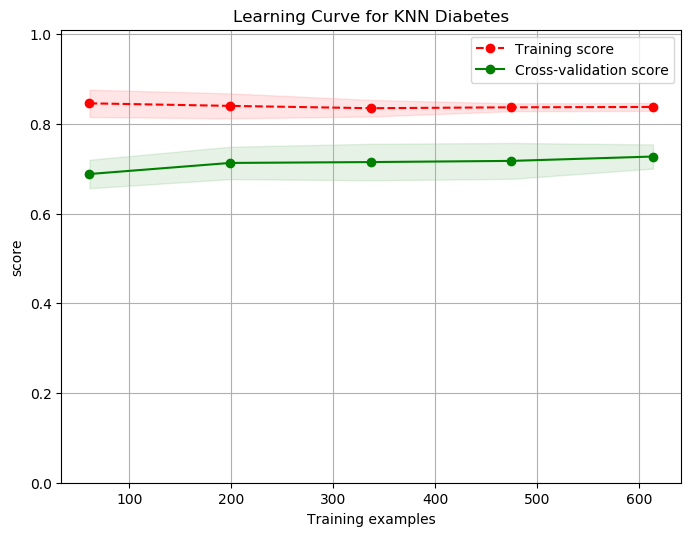

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [44]:
from sklearn.model_selection import learning_curve
import numpy as np

# 定义一个函数用于绘制学习曲线
def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    函数功能描述：生成训练集和测试集的简单学习曲线。

    参数：
    ----------
    estimator : 分类器或预测器对象。
    title: 字符串类型, 图的标题
    X : 矩阵类型, shape (n_samples, n_features)， 用于保存训练样本，其中行表示样本的数量，列表示特征的数量
    y : 矩阵类型, shape (n_samples) 或者 (n_samples, n_features), 该参数用于保存样本的标签值，为空时表示无监督学习。
    ylim : 元组类型, shape (ymin, ymax), 可选。定义图的y轴的取值范围。
    cv : 整型, cross-validation 交叉验证生成器或可迭代设置，可选。用于确定交叉验证的分割策略。
        cv有以下几种输入:
          - None, 默认状态下，使用 3-fold cross-validation,
          - integer, 指定倍数为整数 n.
          - 指定用作交叉验证生成器的对象.
          - 一个可迭代的产生序列/测试的分割对象.
          
          当标签"y"是二进制或者多类时，使用参数integer或None，此时会使用StratifsiedKFold用法类
          当标签"y"不是二进制值，或estimtor不是分类器时，此时会使用KFold用法类
    n_jobs : 整型, 可选。并行运算的数量，通常在使用GPU，或CPU并行的时候使用。
    """

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return plt

from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
# 从模型选择子库中导入数据集拆分工具

knn = KNeighborsClassifier(n_neighbors = 2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize = (8, 6), dpi = 100)
plot_learning_curve(plt, knn, 'Learning Curve for KNN Diabetes',
                   X, y, ylim = (0, 1.01), cv = cv)

从上面的可视化结果可以看出：
1. 训练集准确率较低
2. 训练集和测试集准确率差异较大

==> 这是典型的**欠拟合**现象

然而，KNN算法没有太好的解决办法，我们将在后续的学习中使用更优秀的算法来解决以上的问题。